<a href="https://colab.research.google.com/github/keizikang/self_study_mldl/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 5장. 트리 알고리즘: 화이트 와인을 찾아라!
---

---

## 5-1. 결정트리

---

In [9]:
# 와인 데이터 불러옴
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [10]:
# 데이터프레임의 info()로 각 컬럼의 데이터 타입과 
# 누락된 데이터 여부를 일목요연하게 볼 수 있음
# 총 길이와 Non-null이 같으므로 누락 데이터는 없음
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
# 데이터프레임의 describe()로 각 컬럼의 
# 평균, std, min, max, 1사분위, 중간값, 3사분위를 볼 수 있음
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [11]:
# 입력 데이터는 알콜 도수, 당도, 산도이고 타겟은 class임 (0: 레드, 1:화이트)
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련/테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# LogisticRegression으로 분류 모델을 만들어봄
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(f'훈련 세트 점수:   {lr.score(train_scaled, train_target)}')
print(f'테스트 세트 점수: {lr.score(test_scaled, test_target)}')

훈련 세트 점수:   0.7808350971714451
테스트 세트 점수: 0.7776923076923077


In [5]:
# 계수 확인
print(lr.coef_, lr.intercept_)
newline = "\n"
print(f"""이 모델은 
알코올 도수 값에 {lr.coef_[0, 0]}를 곱하고,
당도에 {lr.coef_[0, 1]}을 곱하고,
pH 값에 {lr.coef_[0, 2]}을 곱한 다음 모두 더합니다.
마지막으로 {lr.intercept_[0]}를 더합니다.
이 값이 0보다 크면 화이트 와인,
작으면 레드 와인입니다.
현재 약 {round(lr.score(test_scaled, test_target)*100)}% 정도를
정확히 화이트 와인으로 분류했습니다.""")

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]
이 모델은 
알코올 도수 값에 0.5127027420455411를 곱하고,
당도에 1.6733910972911517을 곱하고,
pH 값에 -0.6876778082262992을 곱한 다음 모두 더합니다.
마지막으로 1.8177790244973702를 더합니다.
이 값이 0보다 크면 화이트 와인,
작으면 레드 와인입니다.
현재 약 78% 정도를
정확히 화이트 와인으로 분류했습니다.


In [12]:
# 결정 트리는 DecisionTreeClassifier 클래스를 사용함
# 결정 트리는 표준화를 하지 않아도 됨
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print(f'훈련 세트 점수:   {dt.score(train_input, train_target)}')
print(f'테스트 세트 점수: {dt.score(test_input, test_target)}')

훈련 세트 점수:   0.996921300750433
테스트 세트 점수: 0.8584615384615385


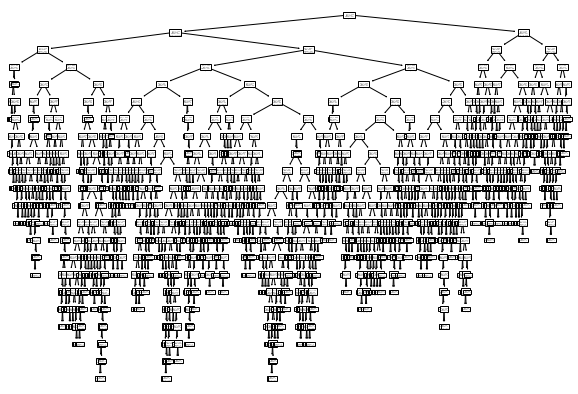

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

In [13]:
# 최대 깊이를 조절하여 다시 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(f'훈련 세트 점수:   {dt.score(train_input, train_target)}')
print(f'테스트 세트 점수: {dt.score(test_input, test_target)}')

훈련 세트 점수:   0.8454877814123533
테스트 세트 점수: 0.8415384615384616


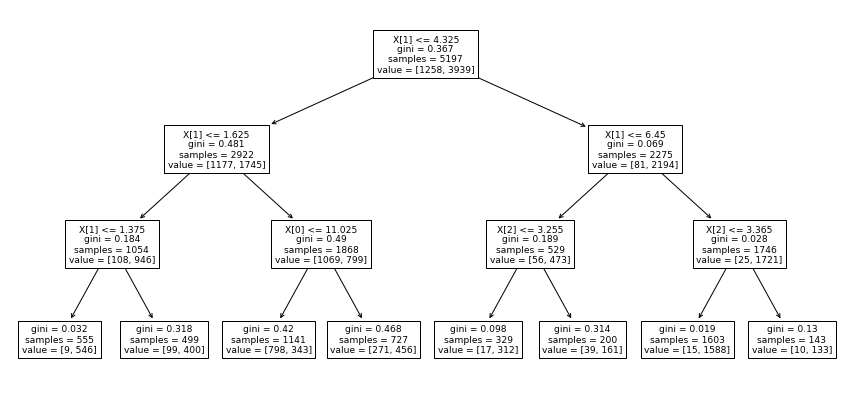

In [9]:
plt.figure(figsize=(15, 7))
plot_tree(dt)
plt.show()

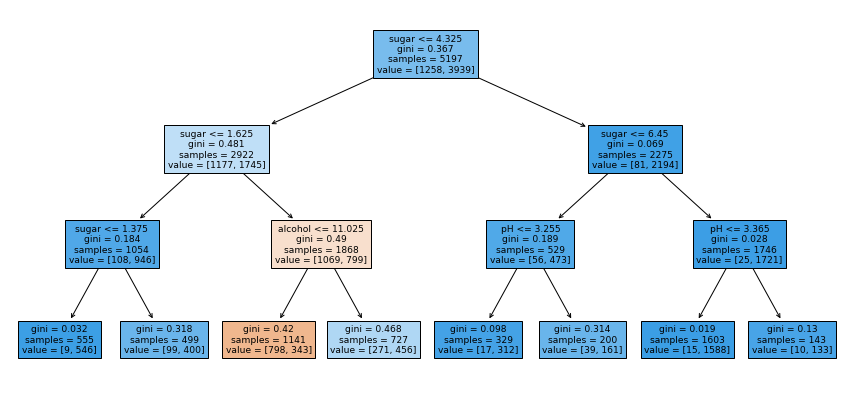

In [10]:
plt.figure(figsize=(15, 7))
plot_tree(dt, 
          filled=True, 
          feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [12]:
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])

In [14]:
dt = DecisionTreeClassifier(min_samples_leaf=5, max_depth=5)
dt.fit(train_input, train_target)
print(f'훈련 세트 점수:   {dt.score(train_input, train_target)}')
print(f'테스트 세트 점수: {dt.score(test_input, test_target)}')

훈련 세트 점수:   0.8668462574562248
테스트 세트 점수: 0.86


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores['test_score'])

import numpy as np
print(np.mean(scores['test_score']))

[0.86923077 0.84615385 0.87680462 0.84889317 0.83541867]
0.855300214703487
